<a href="https://colab.research.google.com/github/SandraOtt/M3/blob/main/M3_ModulWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn import linear_model #https://scikit-learn.org/stable/user_guide.html
from sklearn import tree
from sklearn import ensemble

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

#For Principal Component Analysis
from sklearn.decomposition import PCA

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf



In [5]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [6]:
import zipfile


with zipfile.ZipFile('/gdrive/MyDrive/CAS/M3/bank-additional.zip','r') as source:
    source.extractall('/gdrive/MyDrive/CAS/M3')

In [7]:
df = pd.read_csv ('/gdrive/MyDrive/CAS/M3/bank-additional/bank-additional-full.csv', sep= ';', na_values =('NaN', ''), keep_default_na = False)
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#pip install dtreeviz

In [9]:
#from dtreeviz.trees import dtreeviz # remember to load the package

In [10]:
useful_fields = ['job',
                  'marital', 'education', 'default',
                  'housing', 'loan', 'contact', 'campaign',
                  'pdays', 'previous', 'poutcome',
                  'emp.var.rate', 'cons.price.idx','cons.conf.idx',
                  'euribor3m', 'nr.employed',
                  ]
target_field = {'y'}

#df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

cleanup_nums = {  'job':         { 'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,
                                  'student':8,'technician':9,'unemployed':10,'unknown':11},
                  'marital':     { 'divorced':0,'married':1,'single':2,'unknown':3},
                  'education':   {'basic.4y':0,'basic.6y':1,'basic.9y':2,'high.school':3,'illiterate':4,'professional.course':5,'university.degree':6,'unknown':7},
                  'default':     { 'no':0,'yes':1,'unknown':2},
                  'housing':     { 'no':0,'yes':1,'unknown':2},
                  'loan':        { 'no':0,'yes':1,'unknown':2},
                  'contact':     { 'cellular':1,'telephone':2},
                  'poutcome':    { 'failure':0,'nonexistent':1,'success':2},
                }
cleanup_y = {'y': {'yes':1, 'no':0}}


In [11]:
df_X = df[useful_fields].copy()                              
df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
df_Y = df[target_field].copy()
df_Y.replace (cleanup_y, inplace= True)   #convert continous categorial Y to numerical

x = df_X.to_numpy().astype(np.float32)

y = df_Y.to_numpy().astype(np.float32)

In [12]:
print(x.shape, y.shape)
df.head()

(41188, 16) (41188, 1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.describe ()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
#Split in Test and Train Set
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2)

#macht lineare Regression überhaupt Sinn, wenn y nur 0 oder 1 ist?
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

#Calculate meanstandarddeviation for train and test
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

train mse = 0.28407422
test mse = 0.28157967


In [15]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

train R2 = 0.19663805609001628
test R2 = 0.19076115642898883


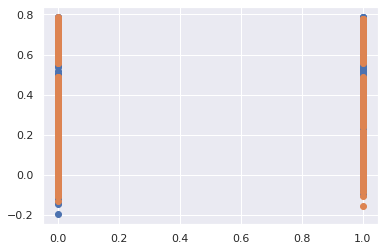

In [16]:
# 4. plot y vs predicted y for test and train parts
plt.scatter(y_train, reg.predict(x_train))
plt.scatter(y_test, reg.predict(x_test))


#Decision Tree


In [17]:
# Da weiss ich nöd so gnau, was ich da mache...
dtcs = []
for depth in (1, 2, 3, 4):
    # do fit
    dtc = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')  # 'entropy'
    dtcs.append(dtc)
    dtc.fit(x_train, y_train)

    # print the training scores
    print("training score : %.3f (depth=%d)" % (dtc.score(x_train, y_train), depth))
    print("training score : %.3f (depth=%d)" % (dtc.score(x_test, y_test), depth))

training score : 0.887 (depth=1)
training score : 0.890 (depth=1)
training score : 0.899 (depth=2)
training score : 0.902 (depth=2)
training score : 0.899 (depth=3)
training score : 0.902 (depth=3)
training score : 0.899 (depth=4)
training score : 0.902 (depth=4)


#Principal Component Analysis
Package required: from sklearn.decomposition import PCA

In [18]:
pca=PCA() # Initialize PCA
pca.fit(df_X) # Call fit methode

PCA()

Text(0.5, 0, 'Principal component')

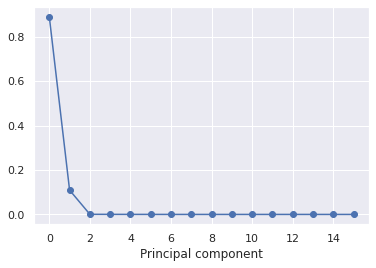

In [19]:
#Plot Explained Variance Ratio
plt.plot(pca.explained_variance_ratio_,'-o')
plt.xlabel('Principal component')



Text(0.5, 1.0, 'Principal component as sum')

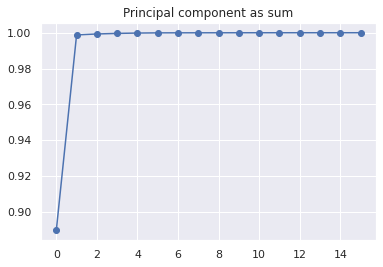

In [20]:
#Plot as Sum
plt.plot(np.cumsum(pca.explained_variance_ratio_),'-o')
plt.title('Principal component as sum')

In [21]:
#get Columns

X_columns= df_X.columns
print(X_columns)
print(len(X_columns))

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
16


In [22]:
df = pd.DataFrame(pca.components_.transpose(), 
                  columns = [f'V_{i+1}' for i in range(len(X_columns))], 
                  index=X_columns)
df

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16
job,0.000551,0.000433,0.111209,0.987019,0.000168,0.115786,-0.001844,0.000190,-0.002207,-0.000257,-0.001613,0.002306,0.001768,0.000131,-0.000352,0.000095
marital,0.000136,0.000692,-0.002901,0.006399,0.001280,-0.033087,-0.019119,-0.075842,0.995123,-0.041289,0.021544,0.004922,0.013758,0.009123,0.000844,-0.000688
education,0.000543,0.000749,0.052931,0.109864,0.018297,-0.987640,0.055237,0.072471,-0.026981,-0.001901,-0.007624,0.007549,0.014465,-0.000157,-0.000296,-0.000924
default,-0.000386,-0.002054,0.000535,-0.008968,0.001323,0.079913,0.221518,0.968137,0.080414,-0.008073,0.008438,-0.007579,-0.017965,0.012678,-0.004710,0.000917
housing,0.000032,0.000339,-0.002652,0.001483,-0.001079,-0.003314,-0.036748,0.014247,0.035162,0.865554,-0.007110,-0.433893,0.244062,-0.007114,-0.008060,-0.002900
loan,-0.000003,-0.000014,-0.000694,-0.000907,0.000564,-0.000662,-0.001347,0.002276,0.022372,0.496105,-0.028325,0.788401,-0.361844,0.006017,0.004133,0.002753
contact,-0.000335,-0.001713,0.024086,-0.008225,0.009061,0.028777,0.262873,-0.040744,-0.004341,-0.025581,-0.290407,0.364005,0.782586,-0.029134,0.307755,0.046515
campaign,-0.000882,-0.005478,-0.026543,0.000902,0.999258,0.016139,-0.020577,0.001955,-0.001162,0.000171,0.003405,-0.001708,-0.002054,0.006329,0.000044,-0.000117
pdays,-0.986685,0.162589,0.003807,0.000075,0.000138,-0.000189,0.000712,-0.000209,0.000022,0.000031,0.000431,-0.000105,-0.000218,-0.000079,-0.000253,0.001618
previous,0.001581,0.002015,-0.006549,0.001483,-0.001867,-0.002186,0.001025,-0.000688,-0.019045,0.008197,0.760876,0.116591,0.208217,-0.024482,-0.042275,0.601034


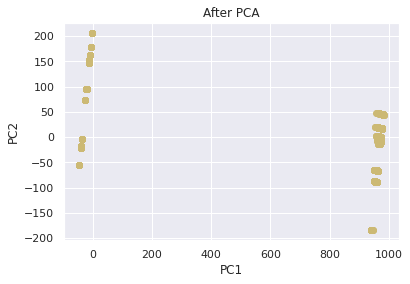

In [23]:
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(df_X) # project the original data into the PCA space

fig, axes = plt.subplots()

axes.scatter(X_new[:,0], X_new[:,1], c=df_Y)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_title('After PCA')
plt.show()

#Clustering with K-Means and Silhouette-Score

Packages required: 

*   from sklearn.cluster import KMeans
*   from sklearn.metrics import silhouette_score


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

[0.9290860597802202, 0.8100871339530717, 0.8240452324142868, 0.804263531104202, 0.796192095606283, 0.7649751240867243, 0.7628666581297042, 0.7596436479497936]


Text(0.5, 1.0, 'Clustering')

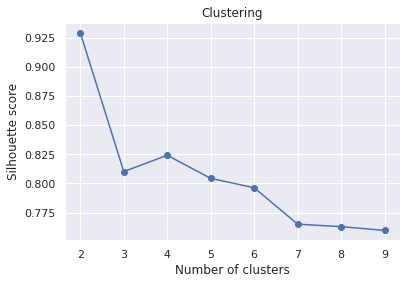

In [25]:
res= []

for iclust in range(2,10):
    clusterer = KMeans(n_clusters=iclust, random_state=10)
    cluster_labels = clusterer.fit_predict(df_X)
    score=silhouette_score(df_X,cluster_labels)
    res.append(score)
  
print(res)
# 3. Plot the Silhouette scores as a function ok k? What is the number of clusters ?
plt.plot(np.arange(len(res))+2, res, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Clustering')